<a href="https://colab.research.google.com/github/fcoliveira-utfpr/agrometeorologia/blob/main/GAMBITEC_DADOS_SH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Selecione o intervalo de dados { run: "auto", vertical-output: true, form-width: "50%", display-mode: "form" }
data_inicial = "2023-01-01" # @param {type:"date"}
data_final = "2023-01-31" # @param {type:"date"}
from datetime import datetime
def verificar_datas(data_inicial, data_final):
    if data_inicial > data_final:
        print("As datas estão inadequadas")
        print("Tente novamente")
    else:
        print("As datas estão corretas")
        print(f"Intervalo: {data_final} a {data_inicial}")
        print("Execute o próximo bloco!")
verificar_datas(data_inicial, data_final)

As datas estão corretas
Intervalo: 2023-01-31 a 2023-01-01
Execute o próximo bloco!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Os gráficos representam o intervalo de '2023-01-01' a '2023-01-31' para Santa Helena - PR. FONTE: SIMEPAR


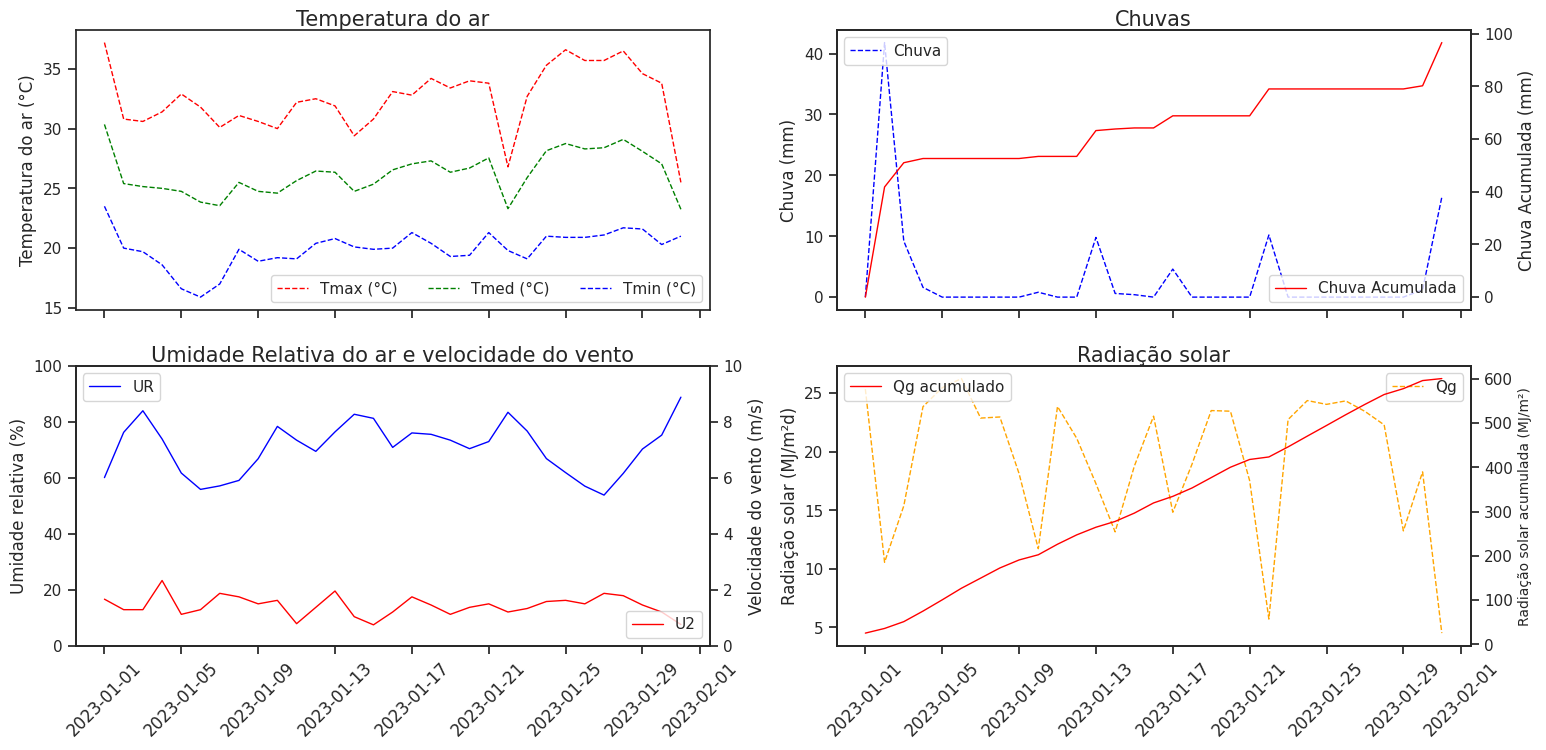

In [ ]:
# @title Bloco com dados { run: "auto", vertical-output: true, form-width: "97%" }
# @markdown Execute este bloco de códico

import numpy as np  # instalando bibliotecas
import pandas as pd # instalando biblioteca
import math
import datetime
from datetime import datetime
from datetime import timedelta
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQABQ6C2vW_WgMOWICPPwoaUNp34JcThVJiFBgCPh2P7VvDW2PyqnkAEfdUxiesAwz5Hunuzeh5IykV/pub?gid=526963453&single=true&output=csv"
df = pd.read_csv(url)
data = df['Data']
df = df.drop(columns=['Data'])
df = df.replace({',': '.'}, regex=True)
df = df.apply(lambda x: pd.to_numeric(x, errors = 'coerce'), axis=1)
dia = []
for i in data:
  a = pd.to_datetime(datetime.strptime(i, '%d/%m/%Y').date())
  dia.append(a)
df['Data'] = dia
df_dia = df
# Selecione os dados dentro do intervalo
df_inter_dia = df_dia.loc[(df_dia['Data'] >= data_inicial) & (df_dia['Data'] <= data_final)]
df_inter_dia
sns.set()
sns.set_style('ticks')
figs, axs = plt.subplots(nrows=2, ncols=2, sharex = True, sharey = False, figsize = (18, 8))
x = df_inter_dia['Data']

axs[0, 0].set_title('Temperatura do ar', size = 15, pad = 3)
axs[0, 0].plot(x, df_inter_dia['Tmax (°C)'], color = 'red', linewidth = 1, linestyle = '--', label = 'Tmax (°C)')
axs[0, 0].plot(x, df_inter_dia['Tmed (°C)'], color = 'green', linewidth = 1, linestyle = '--', label = 'Tmed (°C)')
axs[0, 0].plot(x, df_inter_dia['Tmin (°C)'], color = 'blue', linewidth = 1, linestyle = '--', label = 'Tmin (°C)')
axs[0, 0].set_ylabel('Temperatura do ar (°C)', fontsize = 12)
axs[0, 0].legend(frameon = True, ncol = 3)
axs[0, 1].set_title('Chuvas', size=15, pad=3)
ax2 = axs[0, 1].twinx()  # Adicionando o segundo eixo y
chuva_acum = df_inter_dia['Chuva (mm)'].cumsum()
axs[0, 1].plot(x, df_inter_dia['Chuva (mm)'], color='blue', linewidth=1, linestyle='--', label='Chuva')
ax2.plot(x, chuva_acum, color='red', linewidth=1, linestyle='-', label='Chuva Acumulada')
axs[0, 1].set_ylabel('Chuva (mm)', fontsize=12)
axs[0, 1].legend(frameon=True, loc='upper left')
ax2.set_ylabel('Chuva Acumulada (mm)', fontsize=12)
ax2.legend(frameon=True, loc='lower right', ncol = 1)
axs[1, 0].set_title('Umidade Relativa do ar e velocidade do vento', size = 15, pad = 3)
ax2 = axs[1, 0].twinx()  # Adicionando o segundo eixo y
axs[1, 0].plot(x, df_inter_dia['UR (%)'], color = 'blue', linewidth = 1, linestyle = '-', label = 'UR')
ax2.plot(x, df_inter_dia['Vel. Vento (m/s)'], color='red', linewidth=1, linestyle='-', label='U2')
axs[1, 0].set_ylabel('Umidade relativa (%)', fontsize = 12)
axs[1, 0].legend(frameon = True)
axs[1, 0].set_ylim([0, 100])
ax2.set_ylim([0, 10])
ax2.set_ylabel('Velocidade do vento (m/s)', fontsize=12)
ax2.legend(frameon=True, loc='lower right', ncol = 1)
axs[1, 1].set_title('Radiação solar', size=15, pad=3)
ax2 = axs[1, 1].twinx()  # Adicionando o segundo eixo y
rad_acum = df_inter_dia['Radiação solar (MJ/m²d)'].cumsum()
axs[1, 1].plot(x, df_inter_dia['Radiação solar (MJ/m²d)'], color='orange', linewidth=1, linestyle='--', label='Qg')
ax2.plot(x, rad_acum, color='red', linewidth=1, linestyle='-', label='Qg acumulado')
axs[1, 1].set_ylabel('Radiação solar (MJ/m²d)', fontsize=12)
axs[1, 1].legend(frameon=True)
ax2.legend(frameon=True)  # Adicionando legenda para o segundo eixo
ax2.set_ylabel('Radiação solar acumulada (MJ/m²)', fontsize=10)
axs[1, 0].tick_params(axis ='x', which = 'major', labelsize = 12, rotation = 45)
axs[1, 1].tick_params(axis ='x', which = 'major', labelsize = 12, rotation = 45)
from google.colab import files
df_inter_dia.to_excel('dados.xlsx')
files.download('dados.xlsx')
frase = f"Os gráficos representam o intervalo de '{data_inicial}' a '{data_final}' para Santa Helena - PR. FONTE: SIMEPAR"
print(frase)

##Para mais gráficos, rode os blocos abaixo:

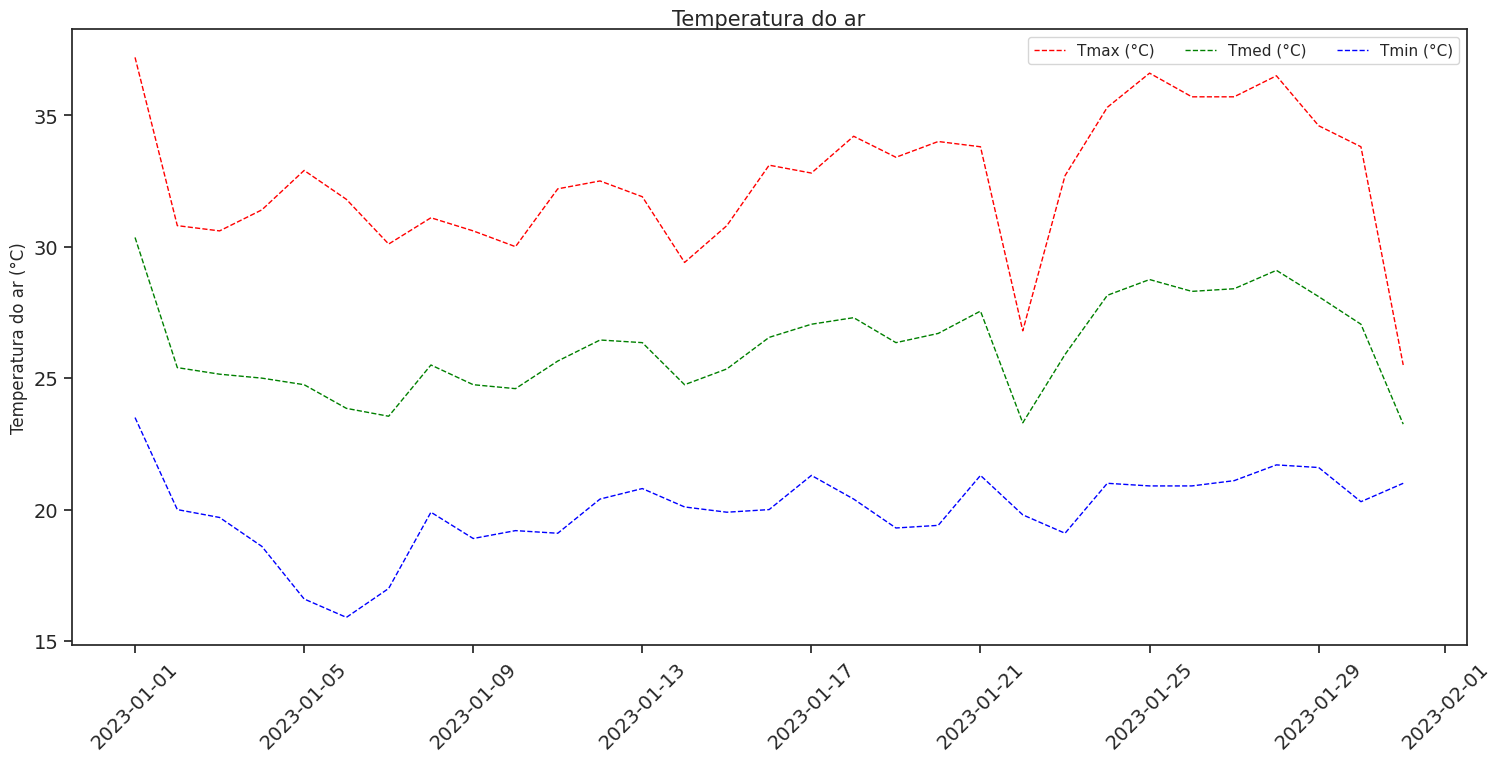

In [ ]:
# @title Temperaturas { run: "auto", vertical-output: true, form-width: "97%" }
sns.set()
sns.set_style('ticks')
figs, axs = plt.subplots(nrows=1, ncols=1, sharex = True, sharey = False, figsize = (18, 8))
x = df_inter_dia['Data']
axs.set_title('Temperatura do ar', size = 15, pad = 3)
axs.plot(x, df_inter_dia['Tmax (°C)'], color = 'red', linewidth = 1, linestyle = '--', label = 'Tmax (°C)')
axs.plot(x, df_inter_dia['Tmed (°C)'], color = 'green', linewidth = 1, linestyle = '--', label = 'Tmed (°C)')
axs.plot(x, df_inter_dia['Tmin (°C)'], color = 'blue', linewidth = 1, linestyle = '--', label = 'Tmin (°C)')
axs.set_ylabel('Temperatura do ar (°C)', fontsize = 12)
axs.legend(frameon = True, ncol = 3)
axs.tick_params(axis ='x', which = 'major', labelsize = 14, rotation = 45)
axs.tick_params(axis ='y', which = 'major', labelsize = 14, rotation = 0)

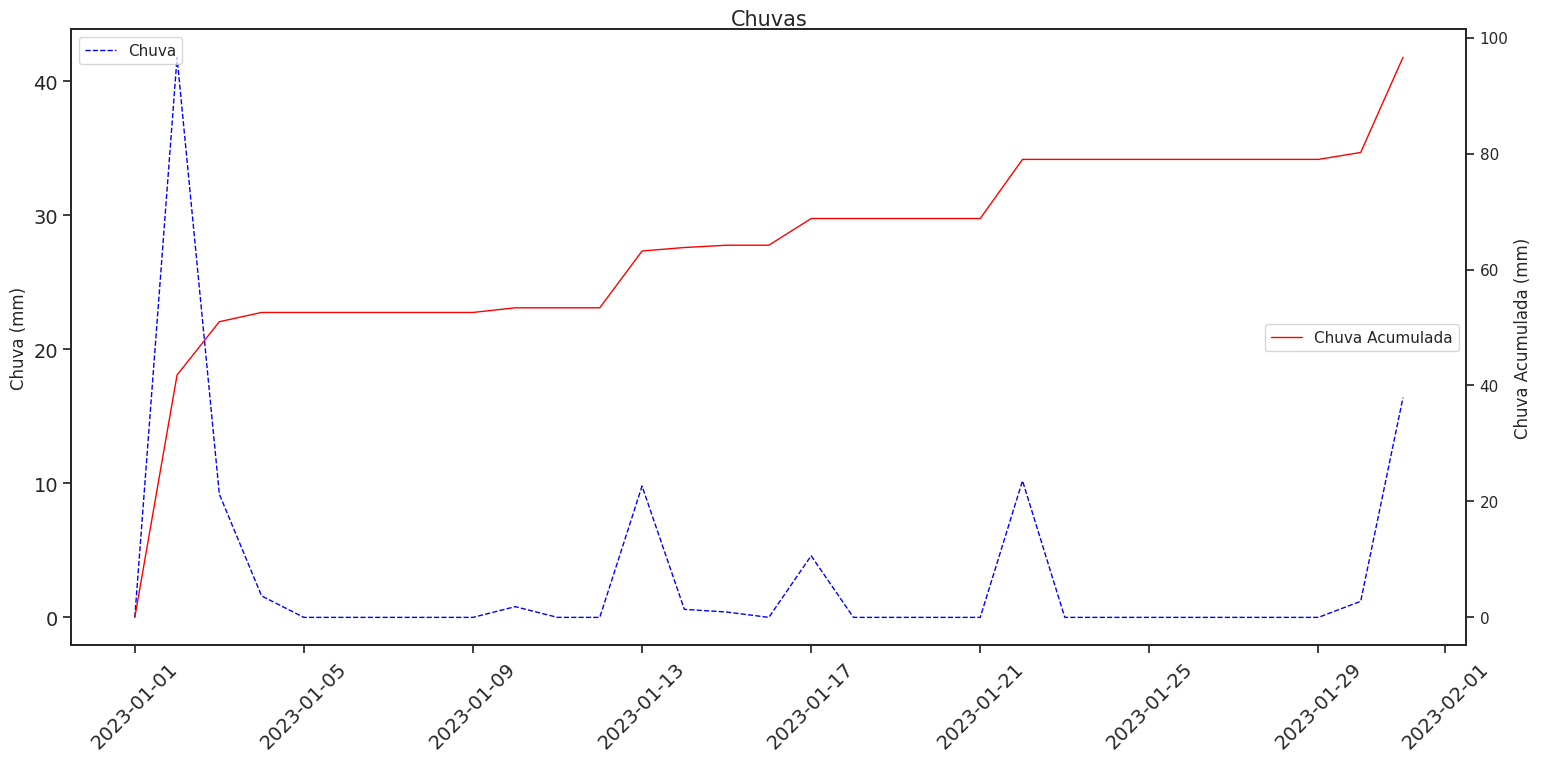

In [ ]:
# @title Chuvas {"run":"auto","vertical-output":true,"form-width":"97%"}
sns.set()
sns.set_style('ticks')
figs, axs = plt.subplots(nrows=1, ncols=1, sharex = True, sharey = False, figsize = (18, 8))
x = df_inter_dia['Data']
axs.set_title('Chuvas', size=15, pad=3)
ax2 = axs.twinx()  # Adicionando o segundo eixo y
chuva_acum = df_inter_dia['Chuva (mm)'].cumsum()
axs.plot(x, df_inter_dia['Chuva (mm)'], color='blue', linewidth=1, linestyle='--', label='Chuva')
ax2.plot(x, chuva_acum, color='red', linewidth=1, linestyle='-', label='Chuva Acumulada')
axs.set_ylabel('Chuva (mm)', fontsize=12)
axs.legend(frameon=True, loc='upper left')
ax2.set_ylabel('Chuva Acumulada (mm)', fontsize=12)
ax2.legend(frameon=True, loc='right', ncol = 1)
axs.tick_params(axis ='x', which = 'major', labelsize = 14, rotation = 45)
axs.tick_params(axis ='y', which = 'major', labelsize = 14, rotation = 0)

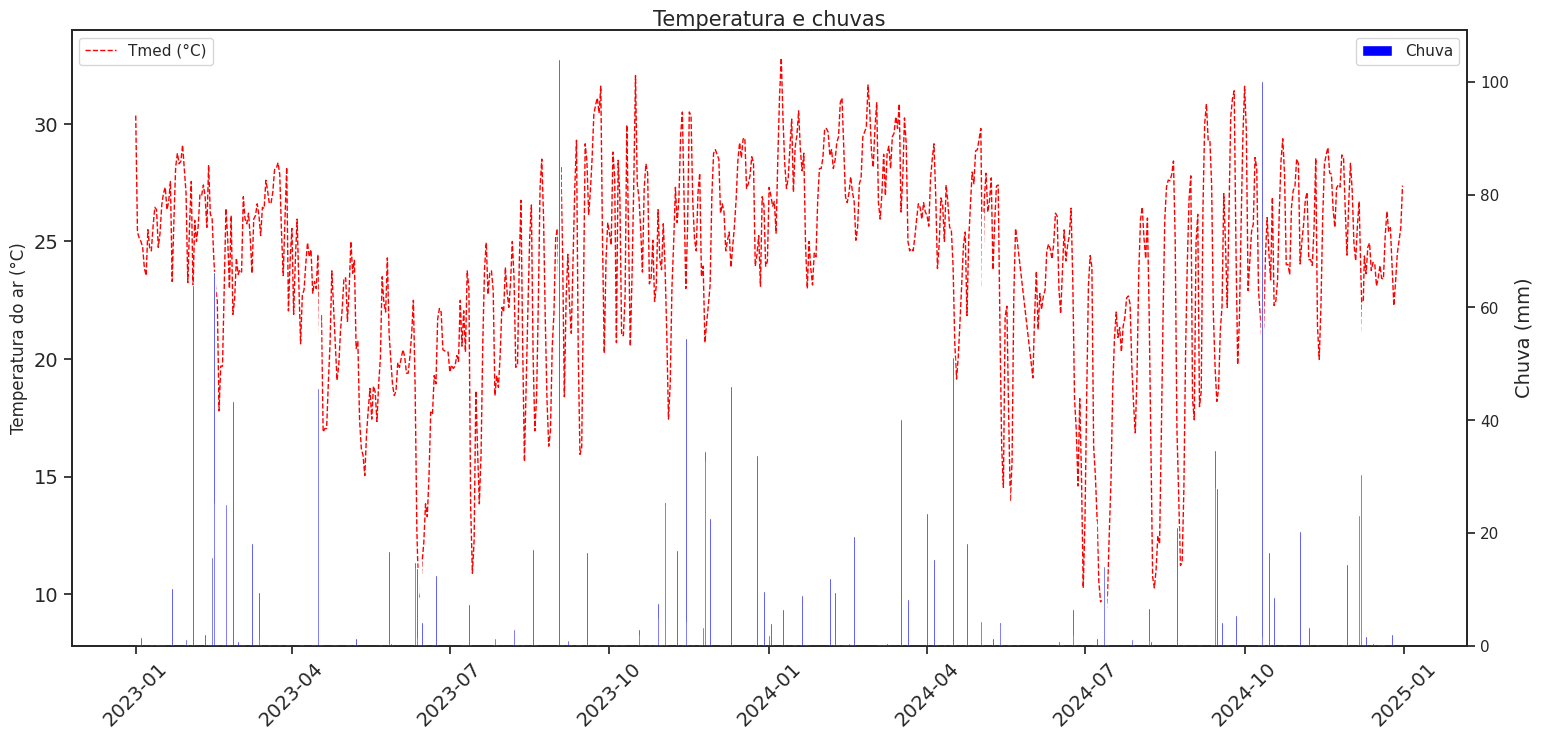

In [ ]:
# @title Temperatura e chuvas {"run":"auto","vertical-output":true,"form-width":"97%"}
sns.set()
sns.set_style('ticks')
figs, axs = plt.subplots(nrows=1, ncols=1, sharex = True, sharey = False, figsize = (18, 8))
x = df_inter_dia['Data']

axs.set_title('Temperatura e chuvas', size = 15, pad = 3)
axs.plot(x, df_inter_dia['Tmed (°C)'], color = 'red', linewidth = 1, linestyle = '--', label = 'Tmed (°C)')
axs.set_ylabel('Temperatura do ar (°C)', fontsize = 12)
axs.legend(frameon = True, loc='upper left', ncol = 1)
ax2 = axs.twinx()  # Adicionando o segundo eixo y
ax2.bar(x, df_inter_dia['Chuva (mm)'], color='blue', linewidth=1, linestyle='-', label='Chuva')
ax2.set_ylabel('Chuva (mm)', fontsize = 14)
ax2.legend(frameon=True, loc='upper right', ncol = 1)
axs.tick_params(axis ='x', which = 'major', labelsize = 14, rotation = 45)
axs.tick_params(axis ='y', which = 'major', labelsize = 14, rotation = 0)


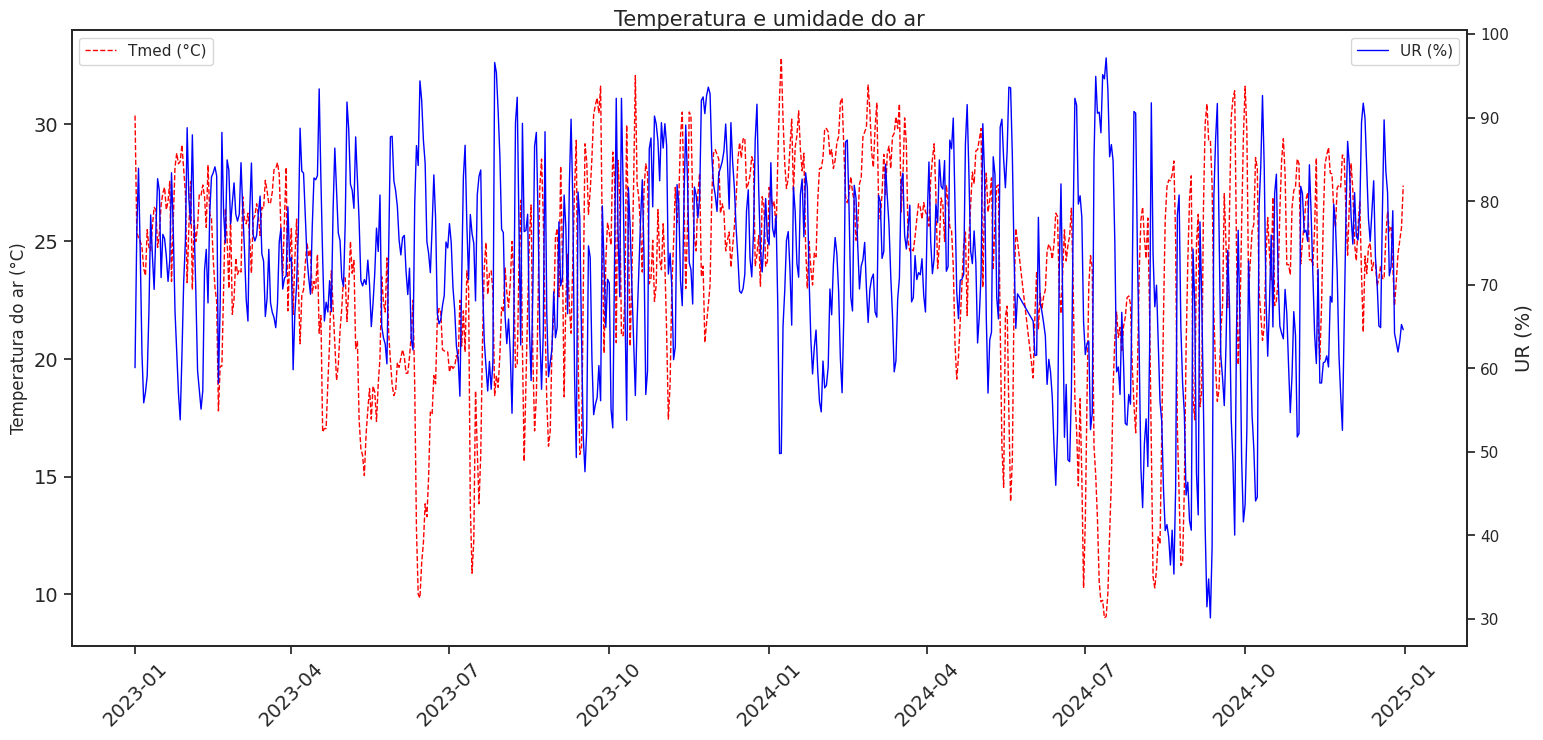

In [ ]:
# @title Temperatura e umidade {"run":"auto","vertical-output":true,"form-width":"97%"}
sns.set()
sns.set_style('ticks')
figs, axs = plt.subplots(nrows=1, ncols=1, sharex = True, sharey = False, figsize = (18, 8))
x = df_inter_dia['Data']

axs.set_title('Temperatura e umidade do ar', size = 15, pad = 3)
axs.plot(x, df_inter_dia['Tmed (°C)'], color = 'red', linewidth = 1, linestyle = '--', label = 'Tmed (°C)')
axs.set_ylabel('Temperatura do ar (°C)', fontsize = 12)
axs.legend(frameon = True, loc='upper left', ncol = 1)
ax2 = axs.twinx()  # Adicionando o segundo eixo y
ax2.plot(x, df_inter_dia['UR (%)'], color='blue', linewidth=1, linestyle='-', label='UR (%)')
ax2.set_ylabel('UR (%)', fontsize = 14)
ax2.legend(frameon=True, loc='upper right', ncol = 1)
axs.tick_params(axis ='x', which = 'major', labelsize = 14, rotation = 45)
axs.tick_params(axis ='y', which = 'major', labelsize = 14, rotation = 0)